In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*-anoms.nc
Files for CMCC-CM2-SR5: ['/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r4i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r5i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r6i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r3i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/merge

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[-1.96171875e+01 -2.60546875e+01 -3.31640625e+01 ... -1.18828125e+01
   -8.20312500e+00 -2.32031250e+00]
  [-1.88046875e+01 -2.80703125e+01 -3.67109375e+01 ... -9.98437500e+00
   -6.85156250e+00 -1.09375000e-01]
  [-1.82500000e+01 -3.05703125e+01 -3.75156250e+01 ... -6.55468750e+00
   -3.28906250e+00 -1.90625000e+00]
  ...
  [ 6.92031250e+01  6.29062500e+01  6.55390625e+01 ...  3.09609375e+01
    3.87890625e+01  4.67421875e+01]
  [ 6.04218750e+01  6.94687500e+01  7.23593750e+01 ...  5.00703125e+01
    5.55390625e+01  6.12578125e+01]
  [ 3.62734375e+01  4.98437500e+01  6.03671875e+01 ...  1.03781250e+02
    1.08960938e+02  1.13671875e+02]]

 [[-2.05625000e+01 -1.95859375e+01 -1.45937500e+01 ... -2.69531250e+00
    3.28125000e+00  5.35937500e+00]
  [-1.67812500e+01 -9.96093750e+00 -5.34375000e+00 ...  5.65625000e+00
    1.15937500e+01  1.80781250e+01]
  [-1.10312500e+01 -4.60937500e+00  2.78125000e+00 ...  1.63750000e+01
    2.4859375

In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

Region grid dimensions: {'lon1': 280, 'lon2': 37.5, 'lat1': 77.5, 'lat2': 20}


/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Forecast range: 2 - 9
Rolling mean range: 8
Processed observations dataset: Frozen({'time': 63, 'lon': 48, 'lat': 24})


In [8]:
# # check the values of obs
# obs["var151"].values

In [9]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

In [10]:
# # Attempt to plot the data
# fnc.plot_obs_data(obs)

In [11]:
# print(variable_data["CMCC-CM2-SR5"])

In [12]:
# fnc.plot_model_data(variable_data, dic.test_model, dic.gif_plots_dir)

In [13]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model)

2022
2021
2020
2019 no nan for this year
Correlation coefficients range from -0.582 to 0.573
P-values range from 0.000 to 0.998


pfield mod [[0.00966898 0.00525063 0.00230546 ...        nan        nan        nan]
 [       nan 0.00649064 0.00277509 ...        nan        nan        nan]
 [       nan        nan 0.00616978 ...        nan        nan        nan]
 ...
 [0.001661   0.00148965 0.00045798 ...        nan        nan        nan]
 [0.0032972  0.00184201 0.00053408 ...        nan        nan        nan]
 [0.00747915 0.00204772 0.00314626 ...        nan        nan        nan]]


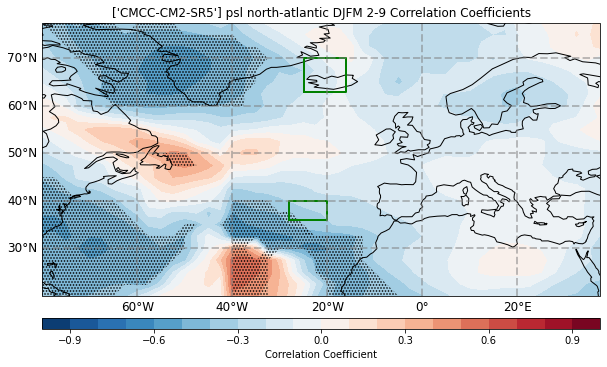

In [14]:
# Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.test_model, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)